# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'0.22.0'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('../titles.csv.bz2', compression='bz2')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
title    244914 non-null object
year     244914 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('../cast.csv.bz2', compression='bz2')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
title        object
year         int64
name         object
type         object
character    object
n            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('../release_dates.csv.bz2', compression='bz2', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
title      479488 non-null object
year       479488 non-null int64
country    479488 non-null object
date       479488 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
total_movies = len(movies.drop_duplicates())
"The total number of movies is: {:,.0f}".format(total_movies)

'The total number of movies is: 244,914'

### List all Batman movies ever made

In [10]:
movies[movies.title == "Batman"]

,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

To get a list of all the Harry Potter movies, the pd.Series.str.contains() was used and the dataframe was sorted by year in descending order using the sort_values() function. 

In [13]:
harry_potter = movies[movies.title.str.contains("Harry Potter",case = False)].sort_values(by=["year"],ascending = False)
harry_potter

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

To see how many movies were made in 2017, only the rows having the value 2017 for the year column were selected and the length of the resulting dataframe was calculated.

In [14]:
"Number of movies made in 2017: {:,}".format(len(movies[movies.year == 2017]))

'Number of movies made in 2017: 11,474'

### Section I - Q2 : How many movies were made in the year 2015?

In [15]:
"Number of movies made in 2015: {:,}".format(len(movies[movies.year == 2015]))

'Number of movies made in 2015: 8,702'

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

To see how many movies were made from 2000 until 2018, multiple conditions were chained when rows were selected from the dataframe. The length of the dataframe that had the value higher or equal to 2000 and smaller or equal to 2018 for the year column was calculated. 

In [16]:
"Number of movies created from 2000-2018: {:,}".format(len(movies[(movies['year'] >= 2000) & (movies['year'] <= 2018 )]))

'Number of movies created from 2000-2018: 114,070'

### Section I - Q4: How many movies are titled "Hamlet"?

In [17]:
f"Number of movies that contain 'Hamlet' in the title name : {len(movies[movies.title.str.contains('Hamlet')])}"

"Number of movies that contain 'Hamlet' in the title name : 57"

In [18]:
f"Number of movies that are titled 'Hamlet' : {len(movies[movies.title == 'Hamlet'])}"

"Number of movies that are titled 'Hamlet' : 20"

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

To list all the movies that are titled 'Hamlet' and that were released on or after year 2000, multiple conditions were chained to select the rows from the movies dataframe that have the title 'Hamlet' and the release year higher than 2000. The dataframe was sorted by year in ascending order using sort_values method.  

In [19]:
hamlet_movies = movies[(movies["title"] == "Hamlet") & (movies["year"] >= 2000)]
hamlet_movies.sort_values(by="year")

,title,year
55639,Hamlet,2000
1931,Hamlet,2009
227953,Hamlet,2011
178290,Hamlet,2014
186137,Hamlet,2015
191940,Hamlet,2016
244747,Hamlet,2017


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

To find the number of roles in the movie "Inception" that are of the supporting cast, multiple conditions were chained when the rows in the cast dataframe were selected. The supporting cast is not ranked by an "n" value, meaning that if the value in the n column is NaN, the actor is a supporting cast. The rows that had title "Inception" and value NaN in the n column were selected from the cast dataframe. To select the NaN values, the ```.isnull()``` function was used. 

In [20]:
inception_extra = len(cast[(cast["title"] == "Inception")&(cast["n"].isnull())])
f"Number of roles in the 'Incption' movies that are supporting cast : {inception_extra}"

"Number of roles in the 'Incption' movies that are supporting cast : 27"

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

To calculate the number of roles in the 'Inception' movie that are of the main cast, first, the rows that had "Inception" value in the title column were selected. Since the main cast does not have NaN value in the n column, the rows that had NaN value in the n column were dropped using ```dropna()``` function. The length of the resulting dataframe was calculated. 

In [21]:
inception_main = len(cast[cast["title"] == "Inception"].n.dropna())
f"Number of main cast roles in the movie 'Inception' : {inception_main}"

"Number of main cast roles in the movie 'Inception' : 51"

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- support cast always have an 'n' value
- remember to sort!

To show the top ten cast in the movie "Inception", the rows that had value "Inception" in the title column were selected using ```cast[cast["title"] == "Inception"]```, the rows containing NaN in the n column were dropped using ```.dropna(subset = ['n'])```, the values in the resulting dataframe were sorted by n value in ascending order using ```.sort_values(by="n")``` and lastly only the first 10 rows of the dataframe were returned using ```.head(10)``` function. 

In [22]:
cast[cast["title"] == "Inception"].dropna(subset = ['n']).sort_values(by="n").head(10)

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

To list all the movies where there was a character 'Albus Dumbledore', the rows that have 'Albus Dumbledore' value in the  "character" column were selected and saved to a new dataframe called albus.

In [23]:
albus = cast[cast["character"] == "Albus Dumbledore"]
albus

,title,year,name,type,character,n
704984,Epic Movie,2007,Dane Farwell,actor,Albus Dumbledore,17.0
792421,Harry Potter and the Goblet of Fire,2005,Michael Gambon,actor,Albus Dumbledore,37.0
792423,Harry Potter and the Order of the Phoenix,2007,Michael Gambon,actor,Albus Dumbledore,36.0
792424,Harry Potter and the Prisoner of Azkaban,2004,Michael Gambon,actor,Albus Dumbledore,27.0
947789,Harry Potter and the Chamber of Secrets,2002,Richard Harris,actor,Albus Dumbledore,32.0
947790,Harry Potter and the Sorcerer's Stone,2001,Richard Harris,actor,Albus Dumbledore,1.0
1685537,Ultimate Hero Project,2013,George (X) O'Connor,actor,Albus Dumbledore,NaN
2248085,Potter,2015,Timothy Tedmanson,actor,Albus Dumbledore,NaN


To get a list of all the actors that played Albus Dumbledore, the "name" column from the dataframe above was selected and the unique values in the series were chosen using ```.unique``` function.

In [24]:
list(albus["name"].unique())

['Dane Farwell',
 'Michael Gambon',
 'Richard Harris',
 "George (X) O'Connor",
 'Timothy Tedmanson']

### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

To see how many roles 'Keanu Reeves' played throughout his career, the rows from the cast dataframe that have "Keanu Reeves" value for the "name" column were selected and the length of the dataframe was calculated.

In [25]:
keanu_roles = len(cast[cast["name"] == "Keanu Reeves"])
f"Number of roles that 'Keanu Reeves' played throughout his career: {keanu_roles}."

"Number of roles that 'Keanu Reeves' played throughout his career: 62."

To see how many unique roles Keanu Reeves played throughout his career, first the rows that have 'Keanu Reeves' value in the name column were selected. Then, the values in the 'character' column were extracted and the ```.unique()``` function was run on the resulted series. Lastly, the length of the array was calculated.

In [26]:
keanu_unique_roles = len(cast[cast["name"] == "Keanu Reeves"]["character"].unique())
f"Number of unique roles that 'Keanu Reeves' played throughout his career: {keanu_unique_roles}."

"Number of unique roles that 'Keanu Reeves' played throughout his career: 56."

To generate a list of the leading roles that 'Keanu Reeves' played on or after 1999, the following conditions were chained when selecting rows from the cast dataframe:
- the value in the "name" column has to be "Keanu Reeves"
- the value in the "n" column has to be 1.0, since we are only interested in the leading characters. 
- the value in the "year" column has to be greater than 1999, since we are interested in movies after 1999.

After the dataframe with the above characters was created, the values in the "character" column were selected. Since we are not interested in duplicate characters, the .unique() function was used.

In [27]:
list(cast[(cast["name"] == "Keanu Reeves") & (cast.n == 1.0) & (cast.year > 1999)]["character"].unique())

['Kai',
 'John Constantine',
 "Conor O'Neill",
 'Henry Torne',
 'John Wick',
 'Evan',
 'Lucas Hill',
 'Detective Tom Ludlow',
 'Nelson Moss',
 'Klaatu',
 'Alex Wyler',
 'Shane Falco',
 'Ramsey']

### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [28]:
roles5060_grouped = cast[(cast.year >= 1950) & (cast.year <= 1960)].groupby("type")["character"].count()
actors = roles5060_grouped["actor"]
actresses = roles5060_grouped["actress"]
"I.11A Total number of roles available from 1950-1960: actors: {:,}, actresses: {:,}".format(actors,actresses)

'I.11A Total number of roles available from 1950-1960: actors: 171,302, actresses: 63,333'

In [29]:
roles0717_grouped = cast[(cast.year >= 2007) & (cast.year <= 2017)].groupby("type")["character"].count()
actors0717 = roles0717_grouped["actor"]
actresses0717 = roles0717_grouped["actress"]
"I.11B Total number of roles available from 2007-2017: actors: {:,}, actresses: {:,}".format(actors0717,actresses0717)

'I.11B Total number of roles available from 2007-2017: actors: 922,782, actresses: 529,631'

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

(A) To get the total number of leading roles available from 2000 to present, rows that have a value bigger or equal to 2000 in the year column and a value equal to 1.0 in the n column were selected from the cast dataframe. The length of the dataframe was calculated. 

In [30]:
a = len(cast[(cast.year >= 2000) & (cast.n == 1.0)])
"Total number of leading roles available from 2000 to present: {:,}".format(a)

'Total number of leading roles available from 2000 to present: 60,568'

(B) To calculate the total number of non-leading roles available from 2000 - present (exclude support cast), the rows that have a value larger than 2000 for the year column and a value not equal to 1.0 (non-leading role) in the n column were selected from the cast dataframe. Since we want to exclude the supporting cast, the rows that have NaN value in the 'n' column were dropped using ```.dropna(subset=["n"])``` function.

In [31]:
b = len(cast[(cast.year >= 2000) & (cast.n != 1.0)].dropna(subset=["n"]))
"Total number of non-leading roles available from 2000 - present (exclude support cast): {:,}".format(b)

'Total number of non-leading roles available from 2000 - present (exclude support cast): 1,001,710'

(C) To calculate the total number of support/extra-credit roles available from 2000 - present, the rows that had a value bigger than 2000 in the "year" column and that contained NaN in the "n" column were selected from the cast dataframe using ```.isnull()```. The length of the dataframe was calculated.

In [32]:
c = len(cast[(cast.year>2000) & (cast.n.isnull())])
"Total number of support/extra-credit roles available from 2000 - present : {:,}".format(c)

'Total number of support/extra-credit roles available from 2000 - present : 875,487'

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [33]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
The Outsider            12
Temptation              12
The Three Musketeers    11
Othello                 11
Freedom                 11
Honeymoon               11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

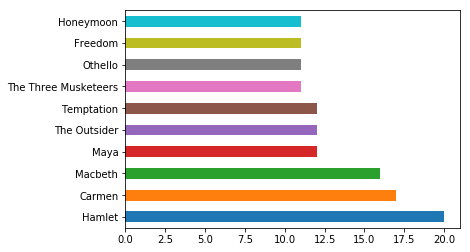

In [34]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

To see what years in the 2000s saw the most movies released, the rows that have value 2000 or higher in the year column were selected from the movies dataframe and the function ```value_counts()``` was used on the "year" column. The top 3 rows were selected using ```[:3]```. 

In [35]:
most_released = movies[(movies.year >= 2000) & (movies.year < 2010)].year.value_counts()[:3]
most_released

2009    6125
2008    5151
2007    4467
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

To plot the total number of films released per-decade, a new "decade" column was created and added to the movies dataframe. To calculate the decade, the values in "year" column were divided by 10 and the reminder was subtracted from the year value. The values in the "decade" column were then counted using the function ```value_counts()``` and the index of the resulting series was sorted using ```sort_index()``` to display the data in chronological order.

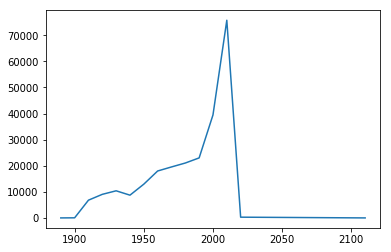

In [36]:
movies["decade"] = movies.year - movies.year%10
decade_counts = movies.decade.value_counts().sort_index()
decade_counts.plot(kind = "line")

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

(A) To get the top 10 most common character names in movie history, a series was selected using the "character" column from the cast dataframe. The ```value_counts()``` function was used to count the frequency of each character in the series. To get the top 10, the ```head(10)``` function was used.

In [37]:
top_10_characters = cast.character.value_counts().head(10)
top_10_characters

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

(B) To get the top 10 people most often credited as "Herself" in movie history, the rows that have "Herself" value for the "character" column were selected from the cast dataframe and a series was formed by selecting "name" column. Function ```value_counts()``` was used to count the frequency of all the names that had value "Herself" in the "character" column. To get the top 10, the function ```head(10)``` was used. 

In [38]:
cast[cast.character == "Herself"].name.value_counts().head(10)

Queen Elizabeth II        12
Mar?a Luisa (V) Mart?n     9
Luisa Horga                9
Joyce Brothers             9
Hillary Clinton            8
Margaret Thatcher          8
Joan Rivers                6
Sumie Sakai                6
Rekha                      6
Marta Berrocal             6
Name: name, dtype: int64

(C) A very similar approach as in (B) was used to solve this question.

In [39]:
cast[cast.character == "Himself"].name.value_counts().head(10)

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

(A)To find the top 10 most frequent roles that start with the word "Zombie", the ```.loc``` method was used to select the column "character" and the rows from the cast dataframe that have a value from "character" column that is a string that starts with word "Zombie". The function ```.startswith()``` was used. The ```.value_counts()``` function was used to count the frequency of each word from the series and the ```.head(10)``` function was used to get the first 10 rows.

In [40]:
cast.loc[cast.character.str.startswith("Zombie"),"character"].value_counts().head(10)

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie #1                        36
Zombie Girl                      36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

(B) A similar approach to (A) was taken to find the top 10 most frequent roles that start with the word "Police".

In [41]:
cast.loc[cast.character.str.startswith("Police"),"character"].value_counts().head(10)

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

To plot how many roles "Keanu Reeves" has played in each year of his career, the ```.loc``` function was used to select the column "year" and the rows in cast dataframe that have "Keanu Reeves" value for the name column. Two separate plots were created to show the same data:
- Line plot: To create the line plot, the function ```value_counts``` was used to count the frequency of each year in the series. The ```sort_index()``` function was used to sort the years in ascending order. A line plot was used to plot the resulting series.
- Histogram : Since the histogram already counts the frequency in the given data, the only step left was to determine the number of bins. Since we are interested in the number of roles in each year, it made sense to have a separate bin for every year from the first time Keanu Reeves started acting until his last movie up to date. To find the number of bins, the min value of the data(the oldest year) was subtracted from the max value of the data(the most recent year).

The histogram provides a better understanding of the data because the years are not connected and it can be clearly seen what are the years when Keanu Reeves did not act.

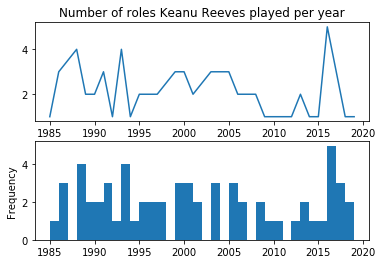

In [42]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
keanu_roles = cast.loc[cast.name == "Keanu Reeves","year"].value_counts().sort_index()
line_plt = keanu_roles.plot(kind = "line", ax = ax1, title = "Number of roles Keanu Reeves played per year")
#
ax2 = fig.add_subplot(212)
keanu_roles_hist = cast.loc[cast.name == "Keanu Reeves","year"]
hist_plt = keanu_roles_hist.plot(kind = "hist", bins = max(keanu_roles_hist)- min(keanu_roles_hist),ax = ax2)


### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


To plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years the data was manipulated in accordance to the following steps:
- A dataframe was created using ```.loc``` function to select the "title","year" and "n" column and rows that have "Keanu Reeves" value in the "name" column. 
- The values in the "n" column represent the importance of the roles. Lower values correspond to more important roles. NaN values in the "n" column represent that the role is supporting cast or extra, and therefore the least important role in the dataset. The NaN values in the "n" column were replaced with the max_value_in_the_n_col + 1, because when the plot will be created, the supporting role needs to hold the highest value in the dataset.
- The dataframe was then grouped by "year" and then "n" using the ```.groupby()``` function and the ```.count()``` function was used to count the number of times the actor had a role with the same importance in the same year. 
- The index of the grouped dataframe was reset to make it more plot friendly. 

In [43]:
keanu_n = cast.loc[cast.name == "Keanu Reeves",["title","year","n"]]
keanu_n["n"] = keanu_n["n"].fillna(keanu_n["n"].max() + 1)
keanu_grouped = keanu_n.groupby(["year","n"]).count()
keanu_grouped.reset_index(inplace = True)
keanu_grouped = keanu_grouped.rename(columns = {"title" : "counts"})
keanu_grouped.head()

,year,n,counts
0,1985,1.0,1
1,1986,2.0,1
2,1986,3.0,1
3,1986,12.0,1
4,1988,1.0,1


Text(0,0.5,'Role Importance')

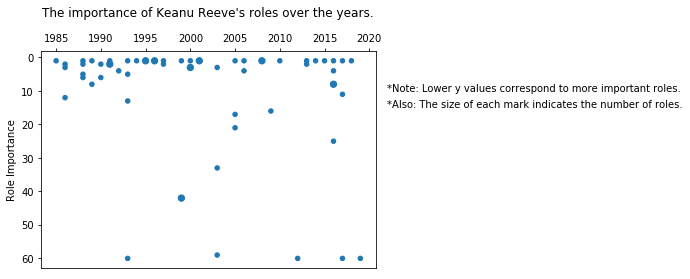

In [44]:
fig, ax = plt.subplots()
ax.scatter(keanu_grouped["year"],keanu_grouped["n"], s = keanu_grouped["counts"] * 20)
ax.xaxis.tick_top()
ax.invert_yaxis()
ax.set_title("The importance of Keanu Reeve's roles over the years.",y = 1.13)
ax.text(2022,10,"*Note: Lower y values correspond to more important roles.")
ax.text(2022,15,"*Also: The size of each mark indicates the number of roles.")
ax.set_ylabel("Role Importance")

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

To plot the number of "Hamlet" films made by each decade, the following steps were taken:
- First, the column "decade" of movies with title "Hamlet" was selected and the ```value_counts()``` method was used to count how many movies were made in each decade.
- Since this is chronological data, it makes sense to include in the graph the decades when no Hamlet movies were made.
- The index of the 'hamlet' dataframe was changed to become pandas.core.indexes.datetimes.DatetimeIndex
- The ```resample``` function was used to add a missing row for every 10 years that was not present in the data. Every value in the newly inserted rows was 0, because no movies were made that decade. 
- Since the index of the "hamlet" df is a datetime object, only the value of the year was selected. 

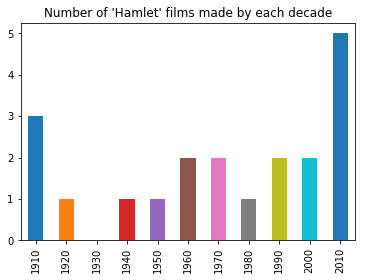

In [45]:
import numpy as np
hamlet = movies.loc[movies.title == "Hamlet",:].decade.value_counts()
hamlet.index = pd.to_datetime(hamlet.index, format = "%Y")
hamlet = hamlet.resample("10Y").mean().fillna(0)
hamlet.index = hamlet.index.year
hamlet.plot(kind = "bar",title = "Number of 'Hamlet' films made by each decade")

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

To calculate the number of leading roles that were available to both actors and actresses, in the 1960s (1960-1969), a dataframe was created using the ```.loc``` function to select rows from the cast dataframe that has the following characteristics:
- The value in the year column was bigger or equal to 1960.
- The value in the year column was smaller or equal to 1969.
- The value in the n column was 1, since a value of 1 in the 'n' column represents a leading role. 

The length of the dataframe was calculated to get the total number of leading roles.
A similar approach was taken to calculate the number of leading roles that were available to both actors and actresses, in the 2000s (2000-2009).

In [46]:
grouped_cast = cast.loc[(cast.year >= 1960) & (cast.year <= 1969) & (cast.n == 1)].groupby("type").type.count()
print("Leading roles in the 1960s:")
grouped_cast

Leading roles in the 1960s:


type
actor      8320
actress    3503
Name: type, dtype: int64

In [47]:
grouped_cast20 = cast.loc[(cast.year >= 2000) & (cast.year <= 2009) & (cast.n == 1)].groupby("type").type.count()
print("Leading roles in the 2000s:")
grouped_cast20

Leading roles in the 2000s:


type
actor      18557
actress     7787
Name: type, dtype: int64

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

To create a list in order by year of each film in which Frank Oz has played more than 1 role, the function the following steps were taken:
- The rows that had "Frank Oz" as value in the name column were selected
- The dataframe was grouped first by "year", and then by "title" using function ```groupby()```.
- The function ```count()``` was used on the grouped dataframe to count the number of times Frank Oz name appeared in the cast dataframe in the same year and the same movie.
- The index of the dataframe was reset.
- A new frank_multiple dataframe was created by selecting all the rows in the previous dataframe that have a value higher than 1 in the "name" column (any of the other columns would have worked as well since all the values in the columns represent the same value of counts). Only the "year","title" and "name" column were selected because the other columns are not of interest for this exercise. 
- The "name" column was renamed to "counts".

In [48]:
frank_grouped = cast[cast.name == "Frank Oz"].groupby(["year","title"]).count()
frank_grouped.reset_index(inplace = True)
frank_multiple = frank_grouped.loc[frank_grouped.name > 1,["year","title","name"]]
frank_multiple = frank_multiple.rename(columns = {"name" : "counts"})
frank_multiple

,year,title,counts
0,1979,The Muppet Movie,8
3,1981,An American Werewolf in London,2
4,1981,The Great Muppet Caper,6
5,1982,The Dark Crystal,2
9,1984,The Muppets Take Manhattan,7
10,1985,Follow That Bird,3
14,1992,The Muppet Christmas Carol,7
15,1996,Muppet Treasure Island,4
17,1999,Muppets from Space,4
19,1999,The Adventures of Elmo in Grouchland,3


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

To get a list of each of the characters that Frank Oz has portrayed at least twice, the following steps were taken:
- created a dataframe 'frank_oz' using ```.loc``` to select the columns 'title', 'year', 'character' and select the rows that have 'Frank Oz' as value name. 
- the ```groupby()``` function was used to group the dataframe created by 'character'
- the ```.count()``` function was used on the grouped dataframe to count the frequency of each character that Frank Oz played
- the rows that had a value higher than 1 for the title column were selected from the frank_oz_grouped dataframe.
- To get a list of character, the ```.index``` function was used. Since the dataframe is a result of the function ```groupby``` done on "character" column, the index of the dataframe is the values in the "character" column. 

In [49]:
frank_oz = cast.loc[cast.name == "Frank Oz",["title","year","character"]]
frank_oz_grouped = frank_oz.groupby("character").count()
frank_oz_characters = frank_oz_grouped[frank_oz_grouped.title > 1].title.rename("Frank Oz Character Counts")
frank_oz_characters

character
Animal            6
Bert              3
Cookie Monster    5
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
Name: Frank Oz Character Counts, dtype: int64

In [50]:
list(frank_oz_characters.index)

['Animal',
 'Bert',
 'Cookie Monster',
 'Fozzie Bear',
 'Grover',
 'Miss Piggy',
 'Sam the Eagle',
 'Yoda']

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

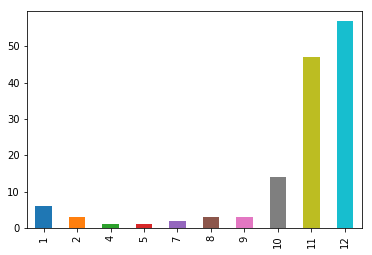

In [51]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

To make a bar plot of the movies that have "Summer" in their titles and that were released in USA a dataframe summer was created by selecting rows from the release_dates that had "USA" value for the country column and string "Summer" in the value for the title column. To make the plot, the following steps were taken:
- the 'date' column was selected
- the function ```dt.month``` was used to extract the month from the date
- the ```value_counts()``` function was used to count the frequency of each month
- the ```sort_index()``` function was used to arrange the months in chronological order. 
- the ```.plot()``` function was used to create a ```hist``` plot.

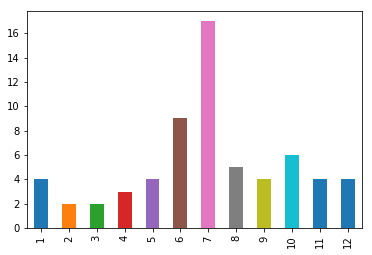

In [52]:
summer = release_dates[(release_dates.title.str.contains("Summer"))&(release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind = "bar")

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

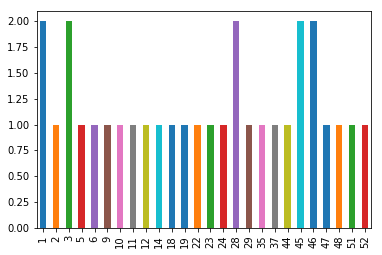

In [53]:
action = release_dates[(release_dates.title.str.contains("Action"))&(release_dates.country == "USA")]
action.date.dt.week.value_counts().sort_index().plot(kind = "bar")

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

To show all the movies in which Keanu Reeves has played the lead role along with their release date in the USA, a dataframe was created by selecting rows from cast dataframe that had "Keanu Reeves" value for "name" column and 1 value for "n" column. This dataframe was then left-merged with a dataframe that had the release_dates in USA. The merge was done on both the "title" and the "year" columns of the two dataframes. The values were then sorted by the date column. 

In [54]:
keanu_lead = cast[(cast.name == "Keanu Reeves")&(cast.n == 1)]
pd.merge(keanu_lead,release_dates[release_dates.country == "USA"],on = ["title","year"]).sort_values(by = "date")

,title,year,name,type,character,n,country,date
20,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,USA,1988-04-15
3,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,USA,1989-02-17
2,Bill & Ted's Bogus Journey,1991,Keanu Reeves,actor,Ted,1.0,USA,1991-07-19
12,Little Buddha,1993,Keanu Reeves,actor,Siddhartha,1.0,USA,1994-05-25
13,Speed,1994,Keanu Reeves,actor,Jack Traven,1.0,USA,1994-06-10
10,Johnny Mnemonic,1995,Keanu Reeves,actor,Johnny Mnemonic,1.0,USA,1995-05-26
1,A Walk in the Clouds,1995,Keanu Reeves,actor,Paul Sutton,1.0,USA,1995-08-11
4,Chain Reaction,1996,Keanu Reeves,actor,Eddie Kasalivich,1.0,USA,1996-08-02
6,Feeling Minnesota,1996,Keanu Reeves,actor,Jjaks Clayton,1.0,USA,1996-09-13
17,The Devil's Advocate,1997,Keanu Reeves,actor,Kevin Lomax,1.0,USA,1997-10-17


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

To make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA, first a dataframe was created by selecting rows from the cast dataframe that had "Keanu Reeves" value for the name column. Another dataframe was created by selecting rows from the release_dates dataframe that had "USA" value for the country column. The two dataframes were left-merged on both title and year and the result dataframe was stored in keanu_usa dataframe. The date column was then selected from this dataframe, the ```dt.month``` function was used to extract the month from the date column, the ```value_counts``` function was used to count the number of occurrences for each month and the index of the resulting series was sorted to sort the months in chronological order. 

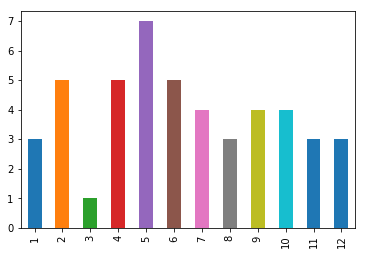

In [55]:
keanu_movies = cast[cast.name == "Keanu Reeves"]
usa_release = release_dates[release_dates["country"] == "USA"]
keanu_usa = pd.merge(keanu_movies, usa_release, on = ["title","year"])
keanu_usa.date.dt.month.value_counts().sort_index().plot(kind = "bar")

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

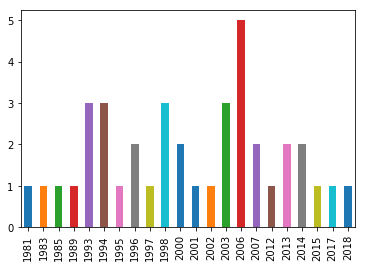

In [56]:
ian_movies = pd.merge(cast[cast.name == "Ian McKellen"],release_dates[release_dates.country == "USA"], on = ["title","year"])
ian_movies.date.dt.year.value_counts().sort_index().plot(kind = "bar")

In [57]:
cast[(cast.name == "Ian McKellen") & (cast.year == 2006)]

,title,year,name,type,character,n
1498658,Doogal,2006,Ian McKellen,actor,Zebedee,9.0
1498661,Flushed Away,2006,Ian McKellen,actor,The Toad,3.0
1498680,The Da Vinci Code,2006,Ian McKellen,actor,Sir Leigh Teabing,3.0
1498698,X-Men: The Last Stand,2006,Ian McKellen,actor,Erik Lehnsherr,3.0
1498699,X-Men: The Last Stand,2006,Ian McKellen,actor,Magneto,3.0
